In [5]:


# D:\python\DASH\Plotly-Dash-master\Chapter-4

import pandas as pd
import plotly.express as px

from dash import Dash, dcc, html, Input, Output


df = pd.read_csv("tweets.csv")


df["name"] = pd.Series(df["name"]).str.lower()
df["date_time"] = pd.to_datetime(df["date_time"])
df = (
    df.groupby([df["date_time"].dt.date, "name"])[
        ["number_of_likes", "number_of_shares"]
    ]
    .mean()
    .astype(int)
)
df = df.reset_index()

# App Layout **************************************************************

stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]
app = Dash(__name__, external_stylesheets=stylesheets)

app.layout = html.Div(
    [
        html.Div(
            html.H1(
                "Twitter Likes Analysis of Famous People", style={"textAlign": "center"}
            ),
            className="row",
        ),
        html.Div(dcc.Graph(id="line-chart", figure={}), className="row"),
        html.Div(
            [
                html.Div(
                    dcc.Dropdown(
                        id="my-dropdown",
                        multi=True,
                        options=[
                            {"label": x, "value": x}
                            for x in sorted(df["name"].unique())
                        ],
                        value=["taylorswift13", "cristiano", "jtimberlake"],
                    ),
                    className="three columns",
                ),
                html.Div(
                    html.A(
                        id="my-link",
                        children="Click here to Visit Twitter",
                        href="https://twitter.com/explore",
                        target="_blank",
                    ),

                  
                    
                    
                    className="two columns",
                ),


                html.Div(


                    html.A(
                        id="UKY MSF",
                        children="line\nline2\nline3",
                        href="https://gatton.uky.edu/MSF",
                        target="_blank",
                    ),

                    
                    
                    
                    
                    className="two columns",
                ),

            ],
            className="row",
        ),
    ]
)


# Callbacks ***************************************************************
@app.callback(
    Output(component_id="line-chart", component_property="figure"),
    [Input(component_id="my-dropdown", component_property="value")],
)
def update_graph(chosen_value):
    print(f"Values chosen by user: {chosen_value}")

    if len(chosen_value) == 0:
        return {}
    else:
        df_filtered = df[df["name"].isin(chosen_value)]
        fig = px.line(
            data_frame=df_filtered,
            x="date_time",
            y="number_of_likes",
            color="name",
            log_y=True,
            labels={
                "number_of_likes": "Likes",
                "date_time": "Date",
                "name": "Celebrity",
            },
        )
        return fig


if __name__ == "__main__":
    app.run(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\hlliu2\.conda\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
!pip install dash

  Using cached dash-2.6.2-py3-none-any.whl (9.8 MB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached Flask_Compress-1.13-py3-none-any.whl (7.9 kB)


You should consider upgrading via the 'c:\users\hlliu2\.conda\envs\test\python.exe -m pip install --upgrade pip' command.


In [3]:
# import the stock_info submodule from the yahoo_fin module 
from yahoo_fin import stock_info as si #



    
price=si.get_live_price("TSLA")
    
print(price)


275.3299865722656


                  High         Low        Open       Close     Volume  \
Date                                                                    
2021-02-25  245.736664  223.526672  242.050003  227.406662  117071700   
2021-02-26  235.566666  219.836670  233.333328  225.166672  123267600   
2021-03-01  239.666672  228.350006  230.036667  239.476669   81408600   
2021-03-02  240.369995  228.333328  239.426666  228.813339   71196600   
2021-03-03  233.566666  217.236664  229.330002  217.733337   90624000   
...                ...         ...         ...         ...        ...   
2021-08-19  228.850006  222.529999  226.070007  224.490005   42940500   
2021-08-20  230.710007  224.566666  227.616669  226.753326   44525700   
2021-08-23  237.376663  226.916672  228.479996  235.433334   60794700   
2021-08-24  238.406662  234.213333  236.893326  236.163330   39249300   
2021-08-25  238.990005  234.666672  235.676666  237.066666   37936800   

             Adj Close  
Date                    


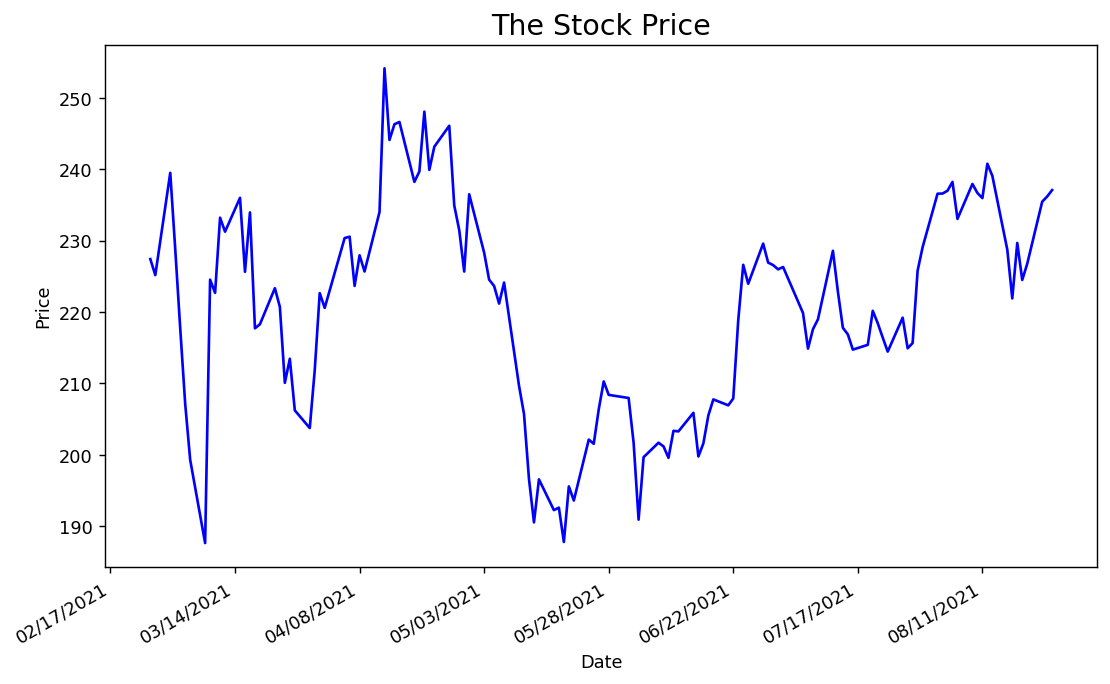

In [6]:
#import needed modules
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import matplotlib.dates as mdates

#set the start and end date
start_date = "2021-02-25"
end_date = "2021-08-25"

#choose stock ticker symbol
ticker = "TSLA"
#get stock price
stock = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
print(stock)
#obtain dates
stock['Date']=stock.index.map(mdates.date2num)
#choose figure size
fig = plt.figure(dpi=128, figsize=(10, 6))
#format date to place on the x-axis
formatter = mdates.DateFormatter('%m/%d/%Y')
plt.gca().xaxis.set_major_formatter(formatter)
# Plot data.
plt.plot(stock['Date'], stock['Adj Close'], c='blue')
# Format plot.
plt.title("The Stock Price", fontsize=16)
plt.xlabel('Date', fontsize=10)
fig.autofmt_xdate()
plt.ylabel("Price", fontsize=10)
plt.show()

In [7]:
# import the stock_info submodule from the yahoo_fin module 
from yahoo_fin import stock_info as si #



    
price=si.get_live_price("TSLA")
    
print(price)


275.3299865722656


In [10]:
import yahoo_fin.stock_info as si



# get earnings history for AAPL
aapl_earnings_hist = si.get_earnings_history("TSLA")



import pandas as pd
 
frame = pd.DataFrame.from_dict(aapl_earnings_hist)

print(frame)


   ticker companyshortname             startdatetime startdatetimetype  \
0    TSLA      Tesla, Inc.  2022-07-20T16:07:00.000Z               TAS   
1    TSLA      Tesla, Inc.  2022-04-20T16:09:00.000Z               TAS   
2    TSLA      Tesla, Inc.  2022-01-26T16:07:00.000Z               TAS   
3    TSLA      Tesla, Inc.  2021-10-20T16:08:00.000Z               TAS   
4    TSLA      Tesla, Inc.  2021-07-26T16:07:00.000Z               TAS   
5    TSLA      Tesla, Inc.  2021-04-26T16:00:00.000Z               TAS   
6    TSLA      Tesla, Inc.  2021-01-27T16:08:00.000Z               TAS   
7    TSLA      Tesla, Inc.  2020-10-21T16:07:00.000Z               TAS   
8    TSLA      Tesla, Inc.  2020-07-22T16:23:00.000Z               TAS   
9    TSLA      Tesla, Inc.  2020-04-29T16:12:00.000Z               TAS   
10   TSLA      Tesla, Inc.  2020-01-29T16:17:00.000Z               TAS   
11   TSLA      Tesla, Inc.  2019-10-23T16:54:00.000Z               TAS   
12   TSLA      Tesla, Inc.  2019-07-24

In [9]:
print(frame)

   ticker companyshortname             startdatetime startdatetimetype  \
0    AAPL       Apple Inc.  2022-07-28T16:30:00.000Z               TAS   
1    AAPL       Apple Inc.  2022-04-28T16:30:00.000Z               TAS   
2    AAPL       Apple Inc.  2022-01-27T16:30:00.000Z               TAS   
3    AAPL       Apple Inc.  2021-10-28T16:30:00.000Z               TAS   
4    AAPL       Apple Inc.  2021-07-27T16:30:00.000Z               TAS   
..    ...              ...                       ...               ...   
95   AAPL       Apple Inc.  1997-10-15T04:00:00.000Z               TAS   
96   AAPL       Apple Inc.  1997-07-16T04:00:00.000Z               TAS   
97   AAPL       Apple Inc.  1997-04-16T04:00:00.000Z               TAS   
98   AAPL       Apple Inc.  1997-01-15T05:00:00.000Z               TAS   
99   AAPL       Apple Inc.  1996-10-16T04:00:00.000Z               TAS   

    epsestimate  epsactual  epssurprisepct timeZoneShortName  \
0          1.16       1.20            3.27     